In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

import seaborn as sns
import os
from keras.applications import VGG19
from os import listdir, makedirs
from os.path import join, exists, expanduser
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from numpy import newaxis
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from glob import glob
from keras.applications import VGG19
from skimage.feature import local_binary_pattern
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.regularizers import l2
from keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import warnings
#warnings.filterwarnings("ignore")

#!pip install pillow==4.0.0
from PIL import Image

In [3]:
from PIL import Image
import os

input_root = r"C:\Users\QM\Downloads\natural_images"  # Thư mục gốc
output_root = r"C:\Users\QM\Downloads\natural_images_resize"  # Thư mục lưu ảnh resize

# Duyệt toàn bộ cây thư mục
for subdir, _, files in os.walk(input_root):
    output_subdir = subdir.replace(input_root, output_root)
    os.makedirs(output_subdir, exist_ok=True)

    for file in files:
        input_path = os.path.join(subdir, file)
        output_path = os.path.join(output_subdir, file)

        try:
            with Image.open(input_path) as img:
                img = img.convert("RGB")
                img.thumbnail((224, 224))  # Resize nhưng giữ nguyên tỷ lệ

                # Tạo nền trắng kích thước 224x224
                new_img = Image.new("RGB", (224, 224), (255, 255, 255))
                new_img.paste(img, ((224 - img.width) // 2, (224 - img.height) // 2))

                # Lưu ảnh đã resize
                new_img.save(output_path)

        except Exception as e:
            print(f"Lỗi xử lý ảnh {input_path}: {e}")

print("Hoàn tất resize ảnh")


Hoàn tất resize ảnh


In [4]:
import os
import shutil
import random

# Đường dẫn gốc chứa các thư mục class (vd: airplane, car, ...)
root_dir = r"C:\Users\QM\Downloads\natural_images_resize"

# Đường dẫn thư mục đầu ra
output_dir = r"C:\Users\QM\Downloads\natural_images_split"
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

# Tạo thư mục train/test
for split_dir in [train_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

# Tỉ lệ train-test
train_ratio = 0.8

# Lặp qua từng class trong thư mục
for class_name in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_name)
    
    if os.path.isdir(class_path):  # Chỉ xử lý thư mục
        images = os.listdir(class_path)
        random.shuffle(images)  # Xáo trộn dữ liệu

        # Chia train-test
        train_size = int(len(images) * train_ratio)
        train_images = images[:train_size]
        test_images = images[train_size:]

        # Tạo thư mục cho class trong tập train/test
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Di chuyển ảnh vào thư mục train
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

        # Di chuyển ảnh vào thư mục test
        for img in test_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("✅ Đã chia tập train/test thành công!")


✅ Đã chia tập train/test thành công!


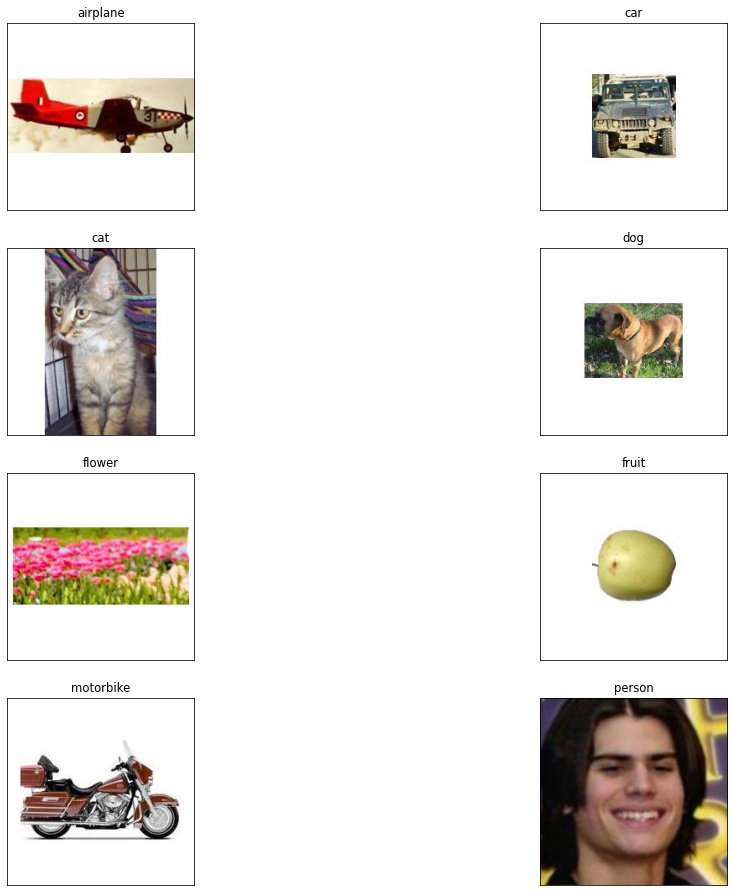

In [6]:
# đường dẫn gốc
BASE_PATH = r"C:\Users\QM\Downloads\natural_images_split\train"

# Đọc ảnh với đường dẫn
airplane = cv2.imread(os.path.join(BASE_PATH, "airplane", "airplane_0001.jpg"))
airplane = cv2.cvtColor(airplane, cv2.COLOR_BGR2RGB) if airplane is not None else None

car  = cv2.imread(os.path.join(BASE_PATH, "car", "car_0000.jpg"))
car = cv2.cvtColor(car, cv2.COLOR_BGR2RGB) if car is not None else None

cat = cv2.imread(os.path.join(BASE_PATH, "cat", "cat_0000.jpg"))
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB) if cat is not None else None

dog = cv2.imread(os.path.join(BASE_PATH, "dog", "dog_0000.jpg"))
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB) if dog is not None else None

flower = cv2.imread(os.path.join(BASE_PATH, "flower", "flower_0000.jpg"))
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB) if flower is not None else None

fruit = cv2.imread(os.path.join(BASE_PATH, "fruit", "fruit_0000.jpg"))
fruit = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB) if fruit is not None else None

motorbike = cv2.imread(os.path.join(BASE_PATH, "motorbike", "motorbike_0002.jpg"))
motorbike = cv2.cvtColor(motorbike, cv2.COLOR_BGR2RGB) if motorbike is not None else None

person = cv2.imread(os.path.join(BASE_PATH, "person", "person_0001.jpg"))
person = cv2.cvtColor(person, cv2.COLOR_BGR2RGB) if person is not None else None

# Danh sách tiêu đề và ảnh
titles = ["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]
images = [airplane, car, cat, dog, flower, fruit, motorbike, person]

# Vẽ ảnh
plt.figure(figsize=(18, 16), dpi=70)
for i in range(8):
    if images[i] is not None:  # Kiểm tra ảnh có tồn tại không
        plt.subplot(4, 2, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    else:
        print(f"Lỗi: Không thể đọc ảnh của {titles[i]}")

plt.show()


In [7]:
print('shape:', airplane.shape)
print('height:', airplane.shape[0])
print('width: ', airplane.shape[1])


shape: (224, 224, 3)
height: 224
width:  224


In [8]:
#Averaging function
def Average(lst):
    return sum(lst) / len(lst)

path= r"C:\Users\QM\Downloads\natural_images_split\train"
listdir = os.listdir(path)
ratios_sub = []
ratios = []

for imdir in listdir:
    imlist = os.listdir(os.path.join(path, imdir))
    for im in imlist:
        im = cv2.imread(os.path.join(path,imdir,im))
        ratio = (im.shape[0] / im.shape[1]) #height/width ratio
        ratios_sub.append((ratio))
    ratios_sub_ave=Average(ratios_sub)
    ratios.append((ratios_sub_ave))
ratio_ave = Average(ratios)
print("Average ratio of width to height is {}".format(ratio_ave))

Average ratio of width to height is 1.0


In [10]:
img_width, img_height = 224,224
train_data_dir = 'C:/Users/QM/Downloads/natural_images_split/train/'
validation_data_dir = 'C:/Users/QM/Downloads/natural_images_split/test/'

numberOfClass=8
batch_size = 32
epochs=50

In [11]:
# Data augmentation cho tập train
train_datagen = ImageDataGenerator(
    rotation_range=30,        # Xoay ngẫu nhiên 30 độ
    width_shift_range=0.2,    # Dịch ngang tối đa 20%
    height_shift_range=0.2,   # Dịch dọc tối đa 20%
    shear_range=0.2,          # Biến dạng hình ảnh
    zoom_range=0.2,           # Phóng to / thu nhỏ 20%
    horizontal_flip=True,     # Lật ngang ảnh
    brightness_range=[0.8, 1.2], # Điều chỉnh độ sáng từ 80% đến 120%
    rescale=1./255,           # Chuẩn hóa giá trị pixel về [0,1]
    fill_mode='nearest',      # Giữ nguyên giá trị pixel khi dịch chuyển
    featurewise_center=True,  # Chuẩn hóa trung bình (mean) về 0
    featurewise_std_normalization=True,  # Chuẩn hóa phương sai
)

# Chỉ chuẩn hóa ảnh cho tập validation (không augmentation)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load dữ liệu từ thư mục
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Quan trọng khi training để tránh bias
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Giữ nguyên thứ tự trong validation
)


Found 5516 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.


In [12]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=8192)]
        )
        print("GPU ready!")
    except RuntimeError as e:
        print(e)

GPU ready!


In [13]:
img_height

224

In [14]:
batch = next(iter(train_generator))
print(batch[0].shape, batch[1].shape)  # Kiểm tra kích thước batch ảnh và label


(32, 224, 224, 3) (32, 8)


c:\Users\QM\anaconda3\envs\PythonQM\lib\site-packages\keras\preprocessing\image.py:1863: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\QM\anaconda3\envs\PythonQM\lib\site-packages\keras\preprocessing\image.py:1873: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

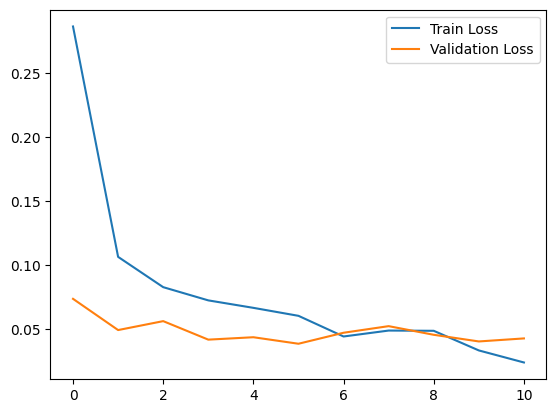

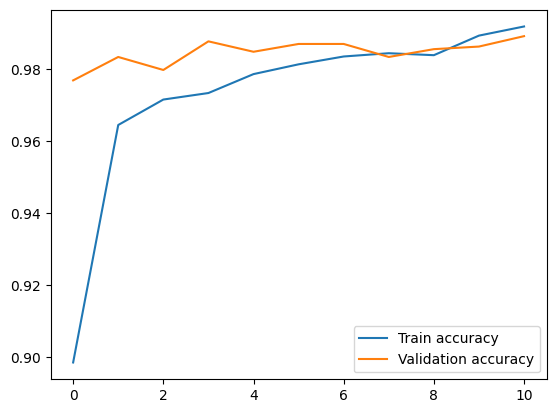

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( img_height,img_width, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False
# Mở khóa các layer cuối cùng của VGG19
for layer in model.layers[-5:]:
    layer.trainable = True

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(numberOfClass))
model.add(Activation('softmax'))
model.summary()

opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)

hist = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)



# model plot

print(hist.history.keys())

plt.plot(hist.history["loss"], label ="Train Loss")
plt.plot(hist.history["val_loss"], label ="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label ="Train accuracy")
plt.plot(hist.history["val_accuracy"], label ="Validation accuracy")
plt.legend()
plt.show()

In [24]:
# Đánh giá mô hình trên tập validation
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


44/44 [==============================] - 5s 107ms/step - loss: 0.0386 - accuracy: 0.9870
Validation Loss: 0.0386
Validation Accuracy: 0.9870


In [16]:
def save_model(model, model_path="classification_natural_model.h5"):
    model.save(model_path)
    print(f"Model saved to {model_path}")

# Lưu model
save_model(model)

Model saved to classification_natural_model.h5


In [17]:
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model

def load_trained_model(model_path="classification_natural_model.h5"):
    return load_model(model_path)

def preprocess_image(image_path, target_size=(224, 224)):  # Đổi target_size thành 224x224
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File not found: {image_path}")

    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not read the image. Check if the file is valid: {image_path}")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image.astype("float32") / 255.0  # Chuẩn hóa ảnh về [0,1]
    image = np.expand_dims(image, axis=0)  # Thêm batch dimension
    return image


def predict_image(model, image_path, class_labels):
    image = preprocess_image(image_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    print(f"Predicted Class: {class_labels[predicted_class]} with confidence {confidence:.2f}")
    return class_labels[predicted_class], confidence



# Load model đã lưu
loaded_model = load_trained_model()

# Danh sách nhãn lớp (cập nhật đúng theo dataset)
class_labels = ["airplane", "car", "cat", "dog", "flower", "fruit", "motorbike", "person"]


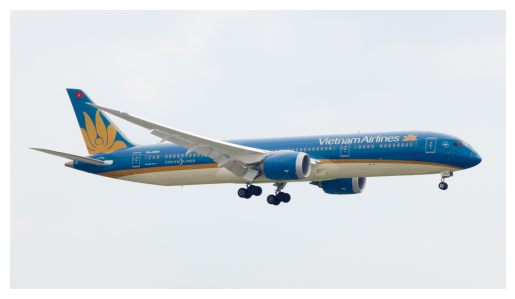

1/1 [==============================] - 0s 17ms/step
Predicted Class: airplane with confidence 1.00


('airplane', 0.99998057)

In [23]:
# Dự đoán ảnh mới
image_path = r"C:\Users\QM\Downloads\Vietnam_Airlines_Boeing_787-9_VN-A869_SGN_10022017.jpg"  # Thay bằng đường dẫn ảnh thực tế
# Đọc ảnh với OpenCV (BGR -> RGB để hiển thị đúng màu)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh
plt.imshow(image)
plt.axis("off")  # Ẩn trục tọa độ
plt.show()
predict_image(loaded_model, image_path, class_labels)